In [23]:
import numpy as np
from matplotlib import pyplot as plt

def parse_file(file_name: str):
    lines = open(file_name, "r").readlines()
    lines = list(filter(lambda x: not x.startswith("#"), lines))
    data = list(map(lambda x: x.split(), lines))
    return data

def timestamp(row):
    return int(row[3])

events = parse_file("data/top/FileC005.txt")

intervals = [[]]
delta = 10 * 1000 # ms
int_start = 0
curr_interval = 0
n_intervals = 100
i = 0
while True:
    event = events[i]
    if int_start < timestamp(event) < int_start + delta:
        intervals[-1].append(event)
    elif timestamp(event) > int_start + delta:
        curr_interval += 1
        if curr_interval >= n_intervals:
            break
        intervals.append([])
        int_start += delta
        intervals[-1].append(event)

    i += 1

print(len(intervals))
counts = np.array(list(map(lambda x:  len(x), intervals)))
print(counts)
print(np.std(counts))
print(np.mean(counts))

100
[38 22 10 16 23 15 17 16 16 23 22 18 21 21 18 31 32 16 15 22 25 15 18 22
 18 12 19 17 17 23 18 18 26 20 20 19 21 17 17 19 19 17 28 20 12 23 24 16
 25 23 23 21 20 23 29 30 27 22 21 24 17 18 26 24 18 25 27 17 22 17 18 15
 23 27 31 23 20 24 20 22 18 20 21 27 28 19 25 27 29 22 23 23 17 23 17 26
 25 17 23 18]
4.704423450328425
21.22


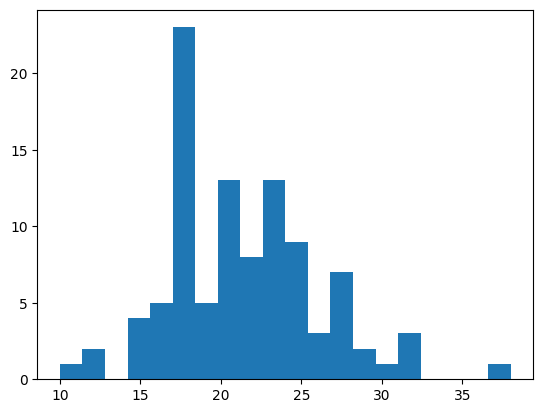

In [26]:
plt.hist(counts, bins=20)
plt.savefig("hist.png")

[38.0, 30.0, 23.333333333333332, 21.5, 21.8, 20.666666666666668, 20.142857142857142, 19.625, 19.22222222222222, 19.6, 19.818181818181817, 19.666666666666668, 19.76923076923077, 19.857142857142858, 19.733333333333334, 20.4375, 21.11764705882353, 20.833333333333332, 20.526315789473685, 20.6, 20.80952380952381, 20.545454545454547, 20.434782608695652, 20.5, 20.4, 20.076923076923077, 20.037037037037038, 19.928571428571427, 19.82758620689655, 19.933333333333334, 19.870967741935484, 19.8125, 20.0, 20.0, 20.0, 19.97222222222222, 20.0, 19.92105263157895, 19.846153846153847, 19.825, 19.804878048780488, 19.738095238095237, 19.930232558139537, 19.931818181818183, 19.755555555555556, 19.82608695652174, 19.914893617021278, 19.833333333333332, 19.93877551020408, 20.0, 20.058823529411764, 20.076923076923077, 20.07547169811321, 20.12962962962963, 20.29090909090909, 20.464285714285715, 20.57894736842105, 20.603448275862068, 20.610169491525422, 20.666666666666668, 20.60655737704918, 20.56451612903226, 20

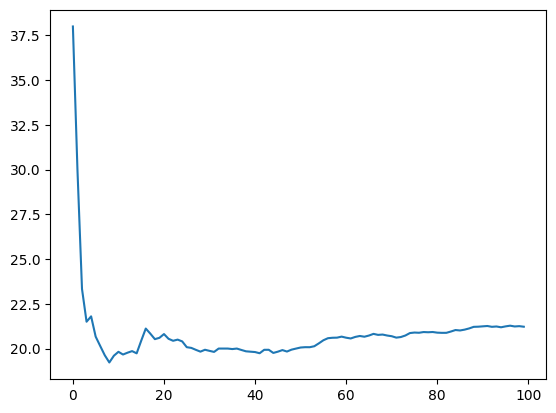

In [28]:
avg = 0
n = 0
running_avgs = []
for i in range(len(intervals)):
    avg += len(intervals[i])
    n += 1
    running_avgs.append(avg / n)

print(running_avgs)

plt.plot(running_avgs)
plt.savefig("avg.png")